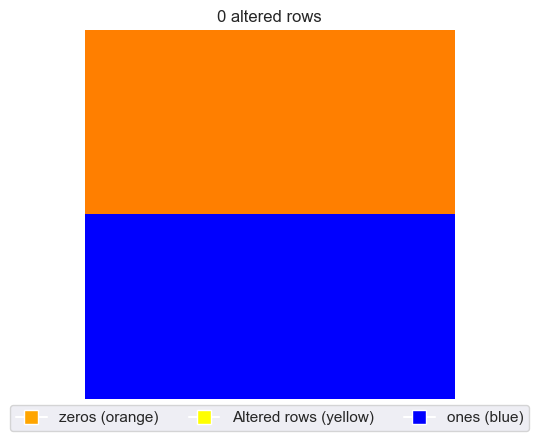

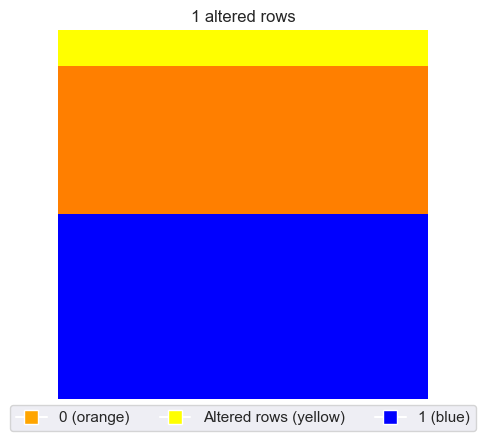

/Users/andreaspagnolo/miniforge3/lib/python3.10/site-packages/gap_statistic/optimalK.py:290: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  centroids, labels = self.clusterer(


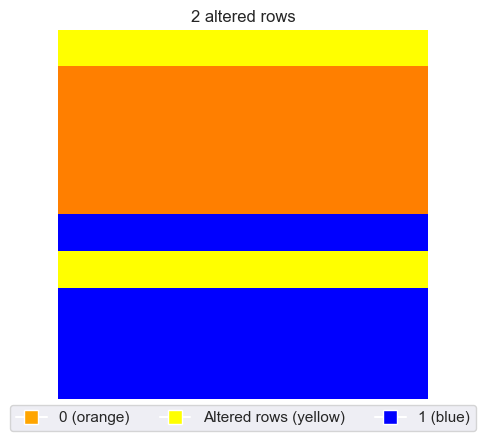

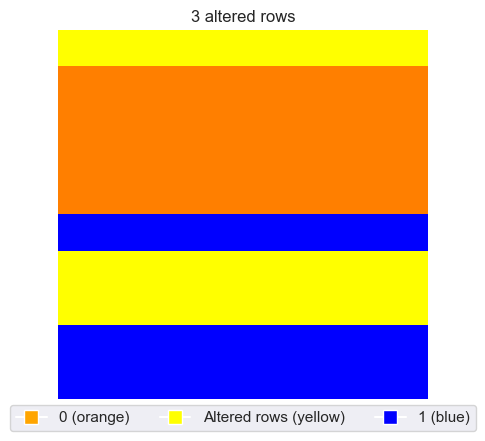

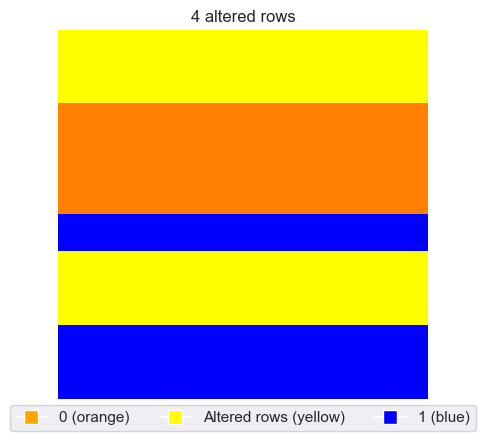

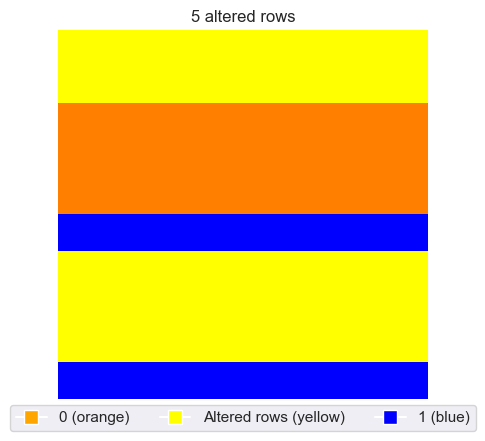

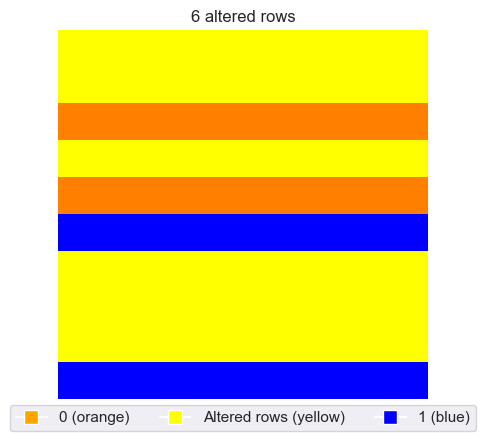

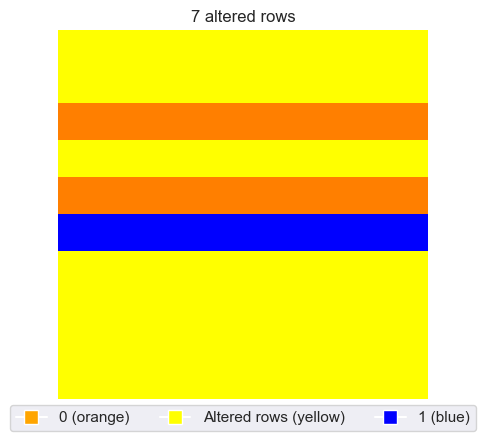

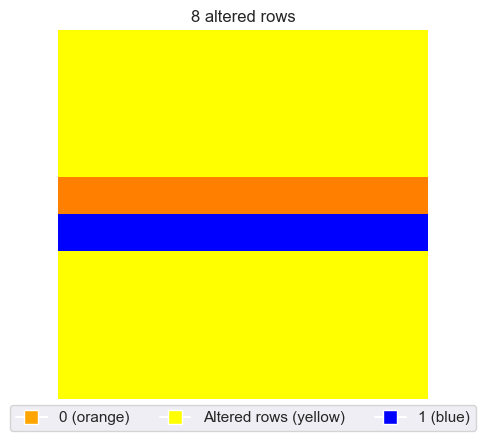

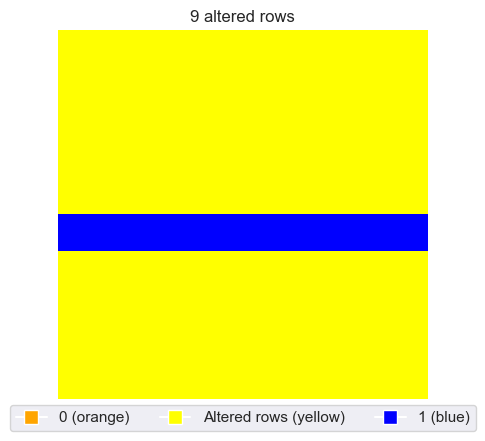

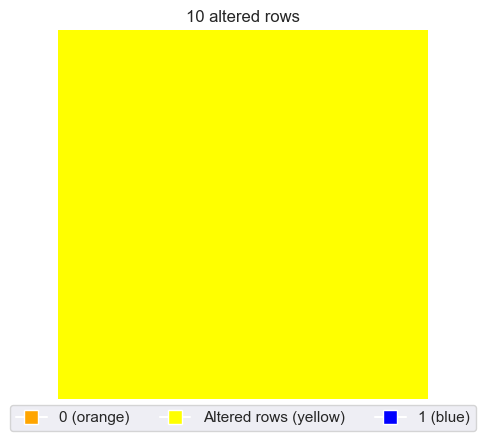

Silhouette Scores:
0.9368837042668826
0.8874909431761471
0.8234264300230807
0.7787998854158562
0.7381752704075382
0.7223765218704861
0.6704890858893795
0.6554890070524064
0.6560141888142439
0.6461674487313391

Complementary Entropy Scores:
0.007225546012191719
0.000288558247189985
0.0025984114322603613
0.001154464004798239
0.018546104966346344
0.000288558247189985
0.007225546012191719
0.01418496282108006
0.004621561179774192
0.004621561179774192

Calinski Harabasz Scores:
2946.822191398424
1624.9678113688108
892.7273125639774
699.4752782291212
546.6187688359558
516.4542386013906
388.26802260362876
347.8505600834298
353.32071754189036
334.0775050250017

Reciprocal Davies-Bouldin Scores:
10.176612761772844
5.8021136432361065
3.782016873417573
3.226822777190481
2.8109363416521336
2.698337912366251
2.29290505847256
2.2862280132471855
2.252094105629086
2.208850960351358

Dunn-Index Scores:
0.20007644994730284
0.0955825410375219
0.04190302111072774
0.08682773777035785
0.08682773777035785
0.0

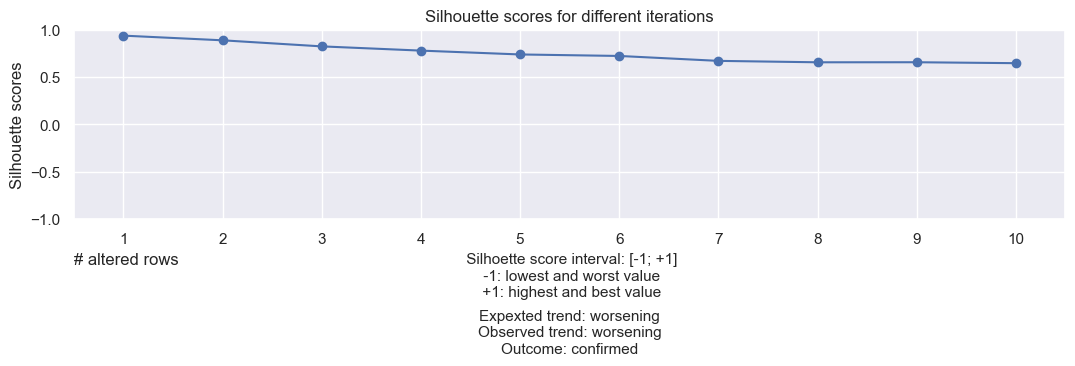

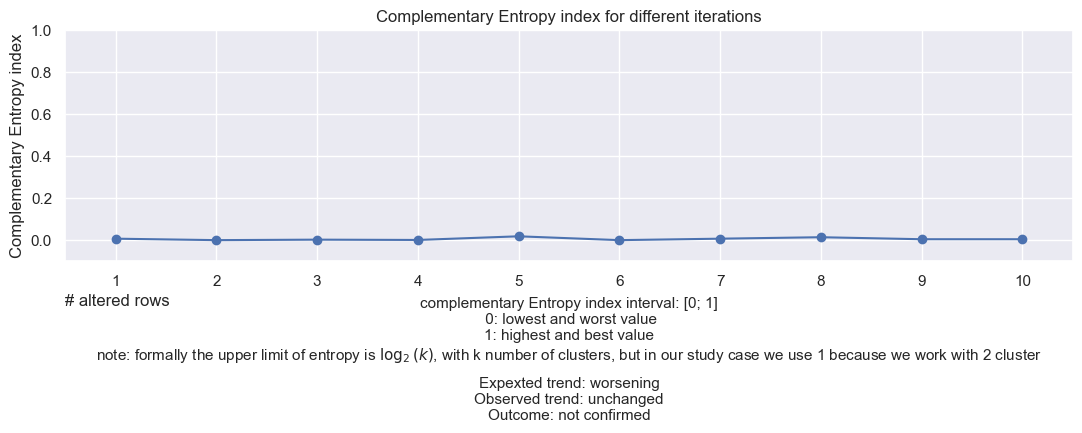

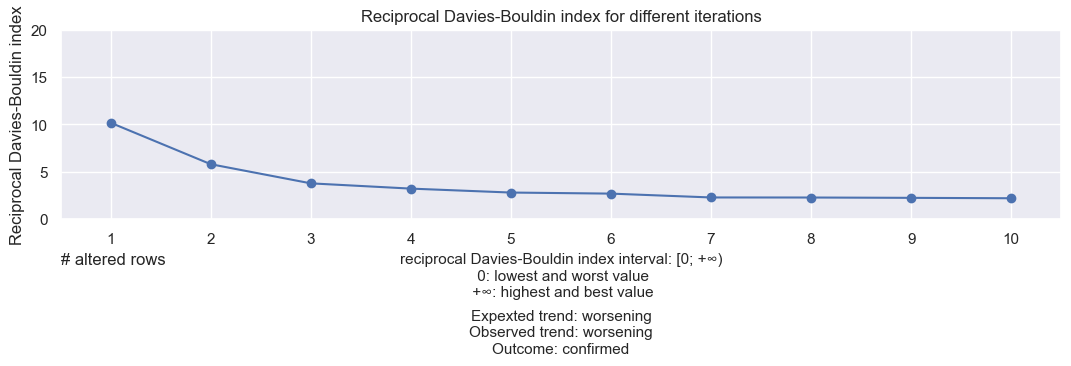

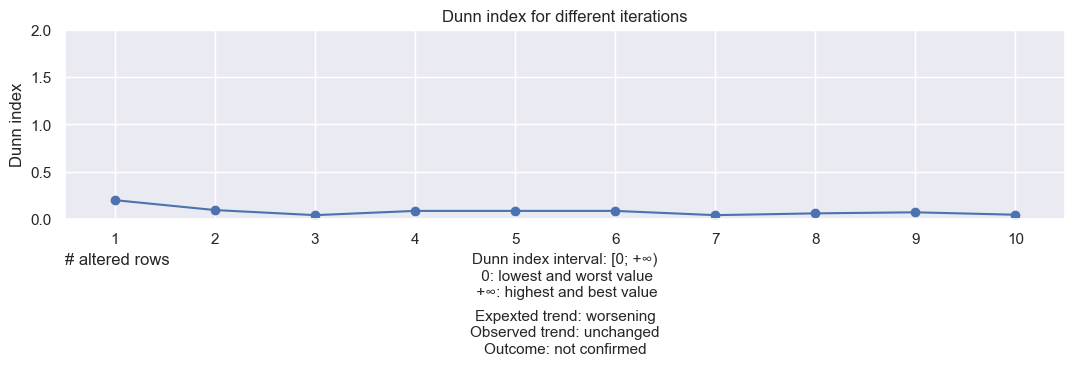

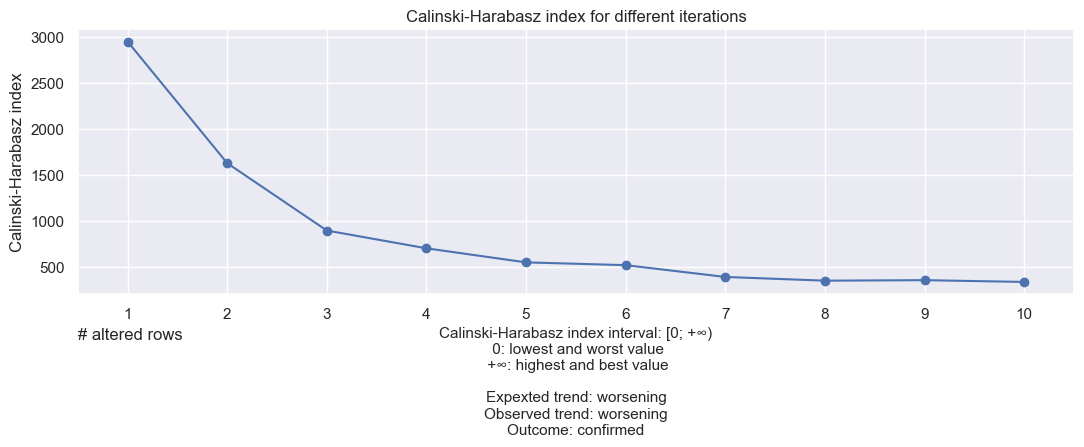

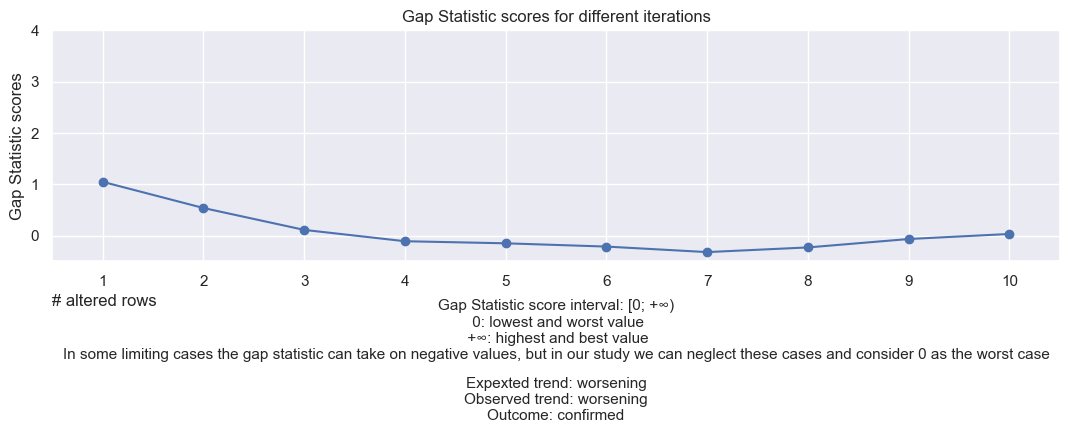

metric,result,time
Silhouette,correct,0.962 ms
Complementary Entropy,wrong,0.348 ms
Reciprocal Davies-Bouldin,correct,4.89 ms
Dunn index,wrong,0.422 ms
Calinski-Harabasz,correct,0.233 ms
Gap Statistic,correct,226.762 ms


Report:
I expect the metrics to get worse as more rows changed. This happened with all the metrics except Entropy and Dunn index which always remains constant.
In particular, the Silhouette worsens as the number of modified lines increases, but I expected a more evident deterioration.
Gap statistic instead worsens as we expected, but has a slightly irregular trend.


In [1]:
import random
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import time
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import pandas as pd

#library for Entropy calculation
from scipy.stats import entropy

#library for Calinski-Harabasz score calculation
from sklearn.metrics import calinski_harabasz_score

#library for davies_bouldin score calculation
from sklearn.metrics import davies_bouldin_score

#library for table style
from IPython.display import display, HTML

from gap_statistic import OptimalK
from sklearn.metrics import pairwise_distances

#python font increase library
from termcolor import colored

#function for dunn_index score calculation
def dunn_index(X, labels):
    unique_labels = np.unique(labels)
    min_intercluster_distance = np.inf
    max_intracluster_diameter = -np.inf

    for i in range(len(unique_labels)):
        for j in range(i + 1, len(unique_labels)):
            cluster_i_points = X[labels == unique_labels[i]]
            cluster_j_points = X[labels == unique_labels[j]]
            
            # Calculate the minimum distance between clusters
            intercluster_distance = np.min(pairwise_distances(cluster_i_points, cluster_j_points))
            min_intercluster_distance = min(min_intercluster_distance, intercluster_distance)

        # Calculate the maximum intra-cluster diameter
        intracluster_diameter = np.max(pairwise_distances(X[labels == unique_labels[i]]))
        max_intracluster_diameter = max(max_intracluster_diameter, intracluster_diameter)
    
        return min_intercluster_distance / max_intracluster_diameter

#set plot style with default seaborn style
sns.set()

silhouette_scores = []  
entropy_scores = []
calinski_harabasz_scores = []
davies_bouldin_scores = []
dunn_index_scores = [] 
gap_scores = []

tempo_di_calcolo_silhouette = 0
tempo_di_calcolo_entropy = 0
tempo_di_calcolo_calinski_harabasz = 0
tempo_di_calcolo_davies_bouldin = 0
tempo_di_calcolo_dunn_index = 0
tempo_di_calcolo_gap = 0

#variable for metric trend
silhouette_appo = 0
entropy_appo = 0
calinski_harabasz_appo = 0
davies_bouldin_appo = 0
dunn_index_appo = 0
gap_appo = 0


def color_matrix(matrix):
    colored_matrix = np.zeros(matrix.shape + (3,), dtype=float)

    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            if matrix[i, j] == 0:
                colored_matrix[i, j] = [1, 0.5, 0]  # Arancione
            elif matrix[i, j] == 1:
                colored_matrix[i, j] = [0, 0, 1]  # Blu
            elif 0 < matrix[i, j] < 1:
                colored_matrix[i, j] = [1, 1, 0]  # Giallo
            else:
                colored_matrix[i, j] = [1, 1, 1]  # Bianco come valore predefinito

    return colored_matrix

#create matrix 
n=10
matrice = np.zeros((n, n))
meta=n//2
matrice[meta:] = 1

righe_da_modificare = list(range(n))
trovato=0
count = 0

i=0


colored_matrix = color_matrix(matrice)
plt.imshow(np.zeros_like(matrice), cmap='gray')  
plt.imshow(colored_matrix, cmap='rainbow', interpolation='nearest')  
plt.axis('off')
plt.title(str(i)+" altered rows"),
legend_elements = [
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='orange', markersize=10, label='zeros (orange)'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='yellow', markersize=10, label='Altered rows (yellow)'),
    plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=10, label='ones (blue)')
]
plt.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=3)
plt.show()


# Add random numbers to cells containing 0 in the zero_array
while righe_da_modificare:
    indice_riga = random.choice(righe_da_modificare)
    righe_da_modificare.remove(indice_riga)

    tempi_di_calcolo = np.empty((6, 10))
    
    for j in range(n):
        if matrice[indice_riga, j] == 0 or matrice[indice_riga, j] == 1:
            matrice[indice_riga, j] = random.random()
            trovato = trovato + 1
    
    if trovato > 0:
        colored_matrix = color_matrix(matrice)
        count = count +1


        i +=1
        plt.imshow(np.zeros_like(matrice), cmap='gray')  
        plt.imshow(colored_matrix, cmap='rainbow', interpolation='nearest')  
        plt.axis('off')  # Rimuove gli assi
        plt.title(str(i)+" altered rows"),
        legend_elements = [
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='orange', markersize=10, label='0 (orange)'),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='yellow', markersize=10, label='Altered rows (yellow)'),
        plt.Line2D([0], [0], marker='s', color='w', markerfacecolor='blue', markersize=10, label='1 (blue)')
        ]
        plt.legend(handles=legend_elements, loc='center', bbox_to_anchor=(0.5, -0.05), ncol=3)
        plt.show()        

    trovato=0

    # Transform the zero_matrix into a numpy array and then into a vector
    vector = np.array(matrice).flatten()

    # Apply the K-Means algorithm with k=2
    kmeans = KMeans(n_clusters=2, n_init=2, random_state=10)
    kmeans.fit(vector.reshape(-1, 1))  
    # Get cluster labels
    l= kmeans.labels_

    start_time = time.time()
    silhouette_avg = silhouette_score(vector.reshape(-1, 1), l)
    silhouette_scores.append(silhouette_avg)
    end_time = time.time()
    tempo_di_calcolo = end_time - start_time
    tempo_di_calcolo_silhouette = tempo_di_calcolo_silhouette + tempo_di_calcolo
    
    start_time = time.time()
    entropy_val = entropy(np.bincount(l) / len(l), base=2)
    entropy_val = abs(1 - entropy_val)
    entropy_scores.append(entropy_val)
    end_time = time.time()
    tempo_di_calcolo = end_time - start_time
    tempo_di_calcolo_entropy = tempo_di_calcolo_entropy + tempo_di_calcolo
    
    start_time = time.time()
    calinski_harabasz_index = calinski_harabasz_score(vector.reshape(-1, 1), l)
    calinski_harabasz_scores.append(calinski_harabasz_index)
    end_time = time.time()
    tempo_di_calcolo = end_time - start_time
    tempo_di_calcolo_calinski_harabasz = tempo_di_calcolo_calinski_harabasz + tempo_di_calcolo
    
    start_time = time.time()
    davies_bouldin_avg = davies_bouldin_score(vector.reshape(-1, 1), l)
    davies_bouldin_avg = 1 / davies_bouldin_avg
    davies_bouldin_scores.append(davies_bouldin_avg)
    end_time = time.time()
    tempo_di_calcolo = end_time - start_time
    tempo_di_calcolo_davies_bouldin = tempo_di_calcolo_davies_bouldin + tempo_di_calcolo
    
    start_time = time.time()
    dunn_score = dunn_index(vector.reshape(-1, 1), l)
    dunn_index_scores.append(dunn_score)
    end_time = time.time()
    tempo_di_calcolo = end_time - start_time
    tempo_di_calcolo_dunn_index = tempo_di_calcolo_dunn_index + tempo_di_calcolo
    
    start_time = time.time()
    optimal_k = OptimalK(parallel_backend='joblib')
    n_clusters = optimal_k(vector.reshape(-1, 1), cluster_array=np.arange(1, 3))
    gap_df = optimal_k.gap_df
    optimal_gap_statistic = gap_df.loc[gap_df.gap_value.idxmax(), 'gap_value']
    gap_scores.append(optimal_gap_statistic)
    end_time = time.time()
    tempo_di_calcolo = end_time - start_time
    tempo_di_calcolo_gap = tempo_di_calcolo_gap + tempo_di_calcolo


print("Silhouette Scores:")
for score in silhouette_scores:
    print(score)

print("\nComplementary Entropy Scores:")
for score in entropy_scores:
    print(score)
    
print("\nCalinski Harabasz Scores:")
for score in calinski_harabasz_scores:
    print(score)

print("\nReciprocal Davies-Bouldin Scores:")
for score in davies_bouldin_scores:
    print(score)
    
print("\nDunn-Index Scores:")
for score in dunn_index_scores:
    print(score)
    
print("\nGap Scores:")
for score in gap_scores:
    print(score)

# Save metric values to a txt file
with open("/Users/andreaspagnolo/Desktop/uni/stage/result/result_matrix/metrics_values_matrix.txt", "w") as file:
    file.write("Silhouette Scores:\n")
    for score in silhouette_scores:
        file.write(str(score) + "\n")

    file.write("\nComplementary Entropy Scores:\n")
    for score in entropy_scores:
        file.write(str(score) + "\n")

    file.write("\nCalinski Harabasz Scores:\n")
    for score in calinski_harabasz_scores:
        file.write(str(score) + "\n")

    file.write("\nReciprocal Davies-Bouldin Scores:\n")
    for score in davies_bouldin_scores:
        file.write(str(score) + "\n")

    file.write("\nDunn-Index Scores:\n")
    for score in dunn_index_scores:
        file.write(str(score) + "\n")

    file.write("\nGap Scores:\n")
    for score in gap_scores:
        file.write(str(score) + "\n")
    
rows_alteration = np.arange(1, 11)

# Plot of Silhouette variations
plt.figure(figsize=(11, 5))
plt.plot(rows_alteration, silhouette_scores, marker='o')
plt.title('Silhouette scores for different iterations')
plt.xlabel('# altered rows', loc='left')
plt.ylabel('Silhouette scores')
text = ' Silhoette score interval: [-1; +1]\n -1: lowest and worst value\n +1: highest and best value'
plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=11)
text2='Expexted trend: worsening\nObserved trend: worsening\nOutcome: confirmed'
plt.text(0.5, -0.6, text2, ha='center', va='center', transform=plt.gca().transAxes,fontsize=11)
plt.grid(True)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/result/result_matrix/variazioni_Silhouette_matrix.png'
plt.xticks(np.arange(1, 11))
plt.ylim(-1, 1)
plt.xlim(0.5, 10.5)
plt.tight_layout()
plt.savefig(file_path)
plt.show()

# Plot of Entropy variations
plt.figure(figsize=(13, 3))  # Impostazione larghezza e altezza del plot
plt.plot(rows_alteration, entropy_scores, marker='o')
plt.title('Complementary Entropy index for different iterations')
plt.xlabel('# altered rows', loc='left')
plt.ylabel('Complementary Entropy index')
text='complementary Entropy index interval: [0; 1]\n 0: lowest and worst value\n1: highest and best value\n'+ 'note: formally the upper limit of entropy is $\log_{2}(k)$, with k number of clusters, but in our study case we use 1 because we work with 2 cluster'
plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=11)
text2='Expexted trend: worsening\nObserved trend: unchanged\nOutcome: not confirmed'
plt.text(0.5, -0.6, text2, ha='center', va='center', transform=plt.gca().transAxes,fontsize=11)
plt.grid(True)
plt.xticks(np.arange(1, 11))
plt.ylim(-0.1, 1)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/result/result_matrix/variazioni_Entropy_matrix.png'
plt.xlim(0.5, 10.5)
plt.savefig(file_path)
plt.show()


# Plot of Davies_Bouldin variations
plt.figure(figsize=(11, 5))
plt.plot(rows_alteration, davies_bouldin_scores, marker='o')
plt.title('Reciprocal Davies-Bouldin index for different iterations')
plt.xlabel('# altered rows',loc='left')
plt.ylabel('Reciprocal Davies-Bouldin index')
text='reciprocal Davies-Bouldin index interval: [0; +∞)\n 0: lowest and worst value\n +∞: highest and best value'
plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=11)
text2='Expexted trend: worsening\nObserved trend: worsening\nOutcome: confirmed'
plt.text(0.5, -0.6, text2, ha='center', va='center', transform=plt.gca().transAxes,fontsize=11)
plt.grid(True)
plt.xticks(np.arange(1, 11))
plt.ylim(0, 20)
plt.xlim(0.5, 10.5)
plt.tight_layout()
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/result/result_matrix/variazioni_Davies_Bouldin_matrix.png'
plt.savefig(file_path)
plt.show()

# Plot of Dunn_index variations
plt.figure(figsize=(11, 5))
plt.plot(rows_alteration, dunn_index_scores, marker='o')
plt.title('Dunn index for different iterations')
plt.xlabel('# altered rows',loc='left')
plt.ylabel('Dunn index')
text = 'Dunn index interval: [0; +∞)\n 0: lowest and worst value\n +∞: highest and best value' 
plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=11)
text2='Expexted trend: worsening\nObserved trend: unchanged\nOutcome: not confirmed'
plt.text(0.5, -0.6, text2, ha='center', va='center', transform=plt.gca().transAxes,fontsize=11)
plt.grid(True)
plt.xticks(np.arange(1, 11))
plt.ylim(0, 2)
plt.xlim(0.5, 10.5)
plt.tight_layout()
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/result/result_matrix/variazioni_Dunn_index_matrix.png'
plt.savefig(file_path)
plt.show()

# Plot of Calinski_Harabasz Scores variations
plt.figure(figsize=(11, 5))
plt.plot(rows_alteration, calinski_harabasz_scores, marker='o')
plt.title('Calinski-Harabasz index for different iterations')
plt.xlabel('# altered rows', loc='left')
plt.ylabel('Calinski-Harabasz index')
text='\nCalinski-Harabasz index interval: [0; +∞)\n 0: lowest and worst value\n +∞: highest and best value\n\nExpexted trend: worsening\nObserved trend: worsening\nOutcome: confirmed'
plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes,fontsize=11)
plt.xticks(np.arange(1, 11))
plt.grid(True)
plt.xlim(0.5, 10.5)
plt.tight_layout()
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/result/result_matrix/variazioni_Calinski_Harabasz_matrix.png'
plt.savefig(file_path)
plt.show()

# Plot of Gap Statistic variations
plt.figure(figsize=(13, 3))
plt.plot(rows_alteration, gap_scores, marker='o')
plt.title('Gap Statistic scores for different iterations')
plt.xlabel('# altered rows', loc='left')
plt.ylabel('Gap Statistic scores')
text = 'Gap Statistic score interval: [0; +∞)\n 0: lowest and worst value\n +∞: highest and best value\nIn some limiting cases the gap statistic can take on negative values, but in our study we can neglect these cases and consider 0 as the worst case' 
plt.text(0.5, -0.3, text, ha='center', va='center', transform=plt.gca().transAxes, fontsize=11)
text2='Expexted trend: worsening\nObserved trend: worsening\nOutcome: confirmed'
plt.text(0.5, -0.6, text2, ha='center', va='center', transform=plt.gca().transAxes,fontsize=11)
plt.grid(True)
plt.xticks(np.arange(1, 11))
plt.xlim(0.5, 10.5)
plt.ylim(-0.5, 4)
file_path = '/Users/andreaspagnolo/Desktop/uni/stage/result/result_matrix/variazioni_Gap_Statistic_matrix.png'
plt.savefig(file_path)
plt.show()

tempo_di_calcolo_silhouette = tempo_di_calcolo_silhouette / n          
tempo_di_calcolo_entropy = tempo_di_calcolo_entropy / n
tempo_di_calcolo_calinski_harabasz = tempo_di_calcolo_calinski_harabasz / n
tempo_di_calcolo_davies_bouldin = tempo_di_calcolo_davies_bouldin / n
tempo_di_calcolo_dunn_index = tempo_di_calcolo_dunn_index / n
tempo_di_calcolo_gap = tempo_di_calcolo_gap / n

for i in range(0,1):
    tempi_di_calcolo[0, i] = round(tempo_di_calcolo_silhouette * 1000, 3)
    tempi_di_calcolo[1, i] = round(tempo_di_calcolo_entropy * 1000, 3)
    tempi_di_calcolo[2, i] = round(tempo_di_calcolo_davies_bouldin * 1000, 3)
    tempi_di_calcolo[3, i] = round(tempo_di_calcolo_dunn_index * 1000, 3)
    tempi_di_calcolo[4, i] = round(tempo_di_calcolo_calinski_harabasz * 1000, 3)
    tempi_di_calcolo[5, i] = round(tempo_di_calcolo_gap * 1000, 3)

medie_colonne = np.mean(tempi_di_calcolo, axis=0)

file_path="/Users/andreaspagnolo/Desktop/uni/stage/result/result_matrix/final_result"
table_df = pd.DataFrame(columns=["metric", "result", "time"])

dati_tabella = [
    ["Silhouette", "correct", str(tempi_di_calcolo[0,0]) + " ms"],
    ["Complementary Entropy", "wrong", str(tempi_di_calcolo[1,0]) + " ms"],
    ["Reciprocal Davies-Bouldin", "correct", str(tempi_di_calcolo[2,0]) + " ms"],
    ["Dunn index", "wrong", str(tempi_di_calcolo[3,0]) + " ms"],
    ["Calinski-Harabasz", "correct", str(tempi_di_calcolo[4,0]) + " ms"],
    ["Gap Statistic", "correct", str(tempi_di_calcolo[5,0]) + " ms"]
]


for row_data in dati_tabella:
    table_df.loc[len(table_df)] = row_data
    
#save result in a variable
for riga in dati_tabella:
    if riga[1] == "correct":
        if riga[0] == "Silhouette":
            silhouette_appo += 1
        elif riga[0] == "Entropy":
            entropy_appo += 1
        elif riga[0] == "Calinski-Harabasz":
            calinski_harabasz_appo += 1
        elif riga[0] == "Davies-Bouldin":
            davies_bouldin_appo += 1
        elif riga[0] == "Dunn index":
            dunn_index_appo += 1
        elif riga[0] == "Gap Statistic":
            gap_appo += 1


#table style
table_df.style \
  .format(precision=3, thousands=".", decimal=",").set_properties(**{'text-align': 'left'})

# Save HTML table to file
table_df.to_csv(file_path + ".csv")

html_table = table_df.to_html(index=False, classes="table table-striped", border=0)
html_table = html_table.replace('<table', '<table style="width:100%;" text-align:center;"')
html_table = html_table.replace('<td', '<td style="text-align:center;"').replace('<th', '<th style="text-align:center;"')

#print table
display(HTML(html_table))

testo_grande = colored("Report:", attrs=['bold'])

print(testo_grande)
print("I expect the metrics to get worse as more rows changed. This happened with all the metrics except Entropy and Dunn index which always remains constant.")
print("In particular, the Silhouette worsens as the number of modified lines increases, but I expected a more evident deterioration.")
print("Gap statistic instead worsens as we expected, but has a slightly irregular trend.")
with open("/Users/andreaspagnolo/Desktop/uni/stage/result/result_matrix/report_matrix.txt", "w") as file:
    file.write("Report:\n")
    file.write("I expect the metrics to get worse as more rows changed. This happened with all the metrics except Entropy which always remains constant")
    file.write("In particular, the Silhouette worsens as the number of modified lines increases, but I expected a more evident deterioration.")
    file.write("Gap statistic instead worsens as we expected, but has a slightly irregular trend.")